In [1]:
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

#print the number of GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2023-01-26 14:18:22.716882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 14:18:22.798801: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 14:18:23.198949: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/theshadow/miniconda3/lib/:/home/theshadow/miniconda3/envs/si-cctv/lib/:/home/the

Num GPUs Available:  1


2023-01-26 14:18:23.634607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 14:18:23.638679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 14:18:23.638813: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


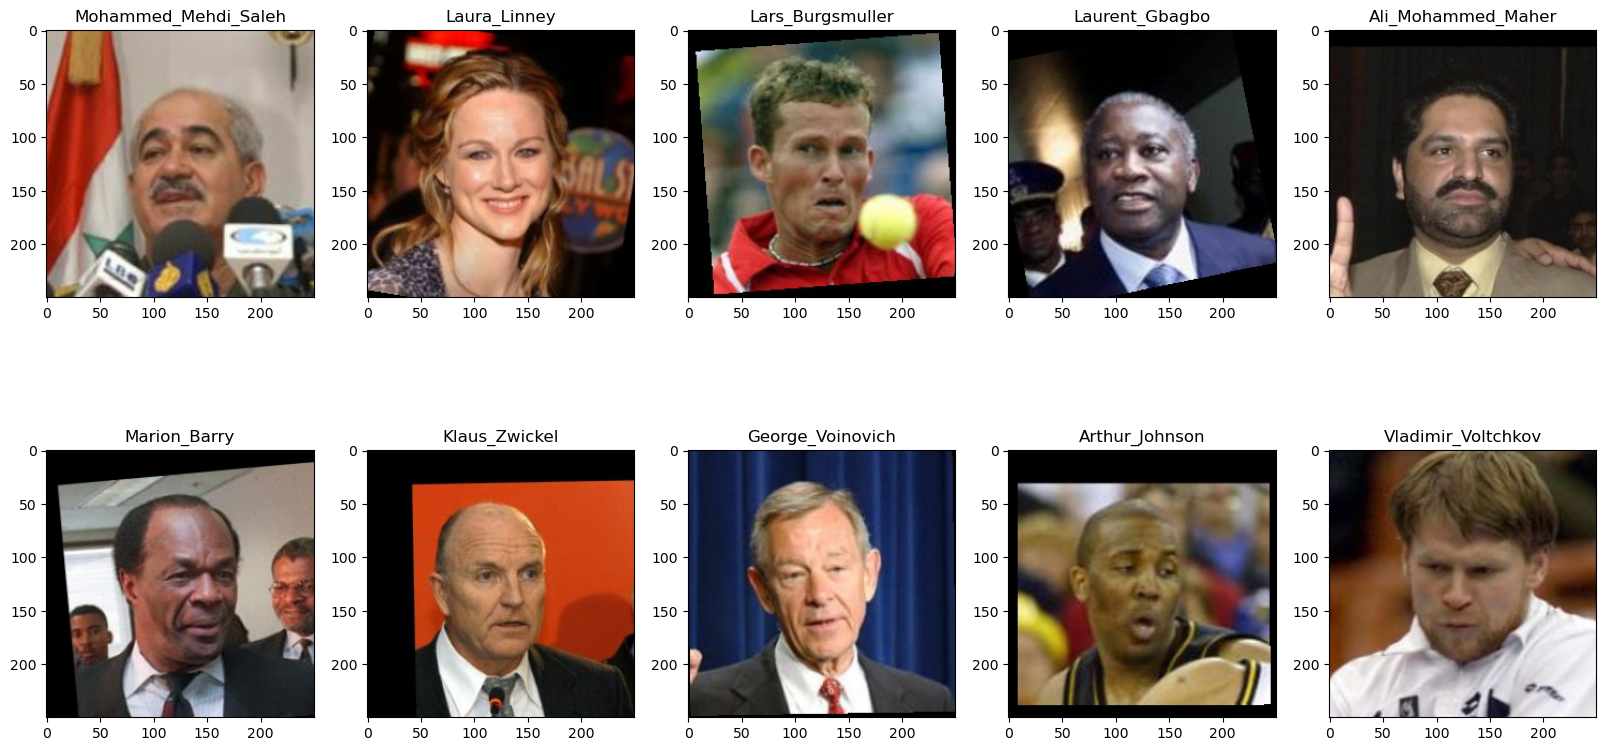

Number of people:  99


In [2]:

pathLFW = './LFW/lfw_funneled/'

#take the first 100 folders
folders = os.listdir(pathLFW)[:100]

#the idea is to create a dataset for a siamese network. We have to create a list of tuples (image1, image2, label) where label is 1 if the two images are of the same person and 0 otherwise
#if there is a person with only one image, we discard use it for the training in the false case

#create a dictionary with the name of the person as key and the list of images as value
dict = {}
for folder in folders:
    #check if its actually a folder
    if not os.path.isdir(pathLFW + folder):
        continue
    images = os.listdir(pathLFW + folder)
    
    dict[folder] = images

#plot some images
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(plt.imread(pathLFW + folders[i*5+j] + '/' + dict[folders[i*5+j]][0]))
        ax[i][j].set_title(folders[i*5+j])
plt.show()


print('Number of people: ', len(dict))
